# Modelo simples de rede neural de regressão

## Criação dos datasets

In [ ]:
# utilizaremos as bibliotecas
import tensorflow as tf # para os modelos de rn
import matplotlib.pyplot as plt # para vizualização dos dados
import numpy as np # para a construção dos dados
import pandas as pd # para a analise dos modelos

In [ ]:
# criar um dataset
x = np.arange(-100, 100, 4)
# criar um label
y = x + 10
x, y

In [ ]:
# dividir os datasets em dados de treino e teste
x_treino = x[:40]
x_teste = x[40:]
y_treino = y[:40]
y_teste = y[40:]
x_treino, y_treino

In [ ]:
# montar um gráfico dos dados de treino e de teste
plt.figure(figsize=(10, 7))
plt.scatter(x_treino, y_treino, c='b', label='Dados de treino')
plt.scatter(x_teste, y_teste, c='g', label='Dados de teste')
plt.legend();

In [ ]:
def grafico_previsoes(train_data=x_treino, # função para vizualização dos dados obtidos
                     train_labels=y_treino,
                     test_data=x_teste,
                     test_labels=y_teste,
                     predictions=y_preds):
  """
  Monta um grafico com os dados de treino, teste e compara as previsões com o dados reais
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Dados de treino")
  plt.scatter(test_data, test_labels, c="g", label="Dados de teste")
  plt.scatter(test_data, predictions, c="r", label="Previsões")
  plt.legend();

In [ ]:
def mae(y_teste, y_pred):
  """
  Calcula o mean absolute error entre o y_teste e o y_pred
  """
  return tf.metrics.mean_absolute_error(y_teste,
                                        y_pred)

def mse(y_teste, y_pred):
  """
  calcula o mean squared error entre o y_teste e o y_pred
  """
  return tf.metrics.mean_squared_error(y_teste,
                                       y_pred)


## Criação dos modelos de RN

### modelo 1

In [ ]:
# contrução do modelo

# setar uma semente de reprodução
tf.random.set_seed(42)
# criação do modelo
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # camada de neurônios
])
# compilação do modelo
model1.compile(loss=tf.keras.losses.mae, # funções de perda (mostram o quão errado o nosso modelo está)
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) # métrica mae(mean absolute error) média*(x-y)/n

In [ ]:
model1.fit(tf.expand_dims(x_treino, axis=-1), y_treino, epochs=100, verbose=0) # treinamento do modelo

In [ ]:
y_preds1 = model1.predict(x_teste) # previsão com base no label

1/1 [==============================] - 0s 56ms/step


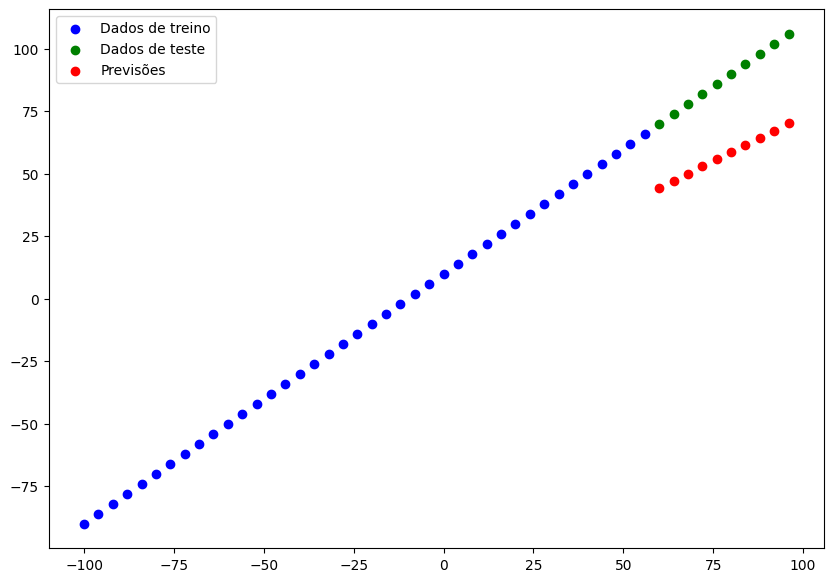

In [ ]:
grafico_previsoes(predictions=y_preds1)

In [ ]:
mae_1 = mae(y_teste, y_preds1.squeeze()).numpy()
mse_1 = mse(y_teste, y_preds1.squeeze()).numpy()
mae_1, mse_1

(30.749228, 956.0331)

### modelo 2

In [ ]:
# criação do segundo modelo
tf.random.set_seed(42)

modelo2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # adicionando mais uma camada
])

modelo2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

modelo2.fit(tf.expand_dims(x_treino, axis=-1), y_treino, epochs=100, verbose=0)

In [ ]:
y_preds2 = modelo2.predict(x_teste)

1/1 [==============================] - 0s 66ms/step


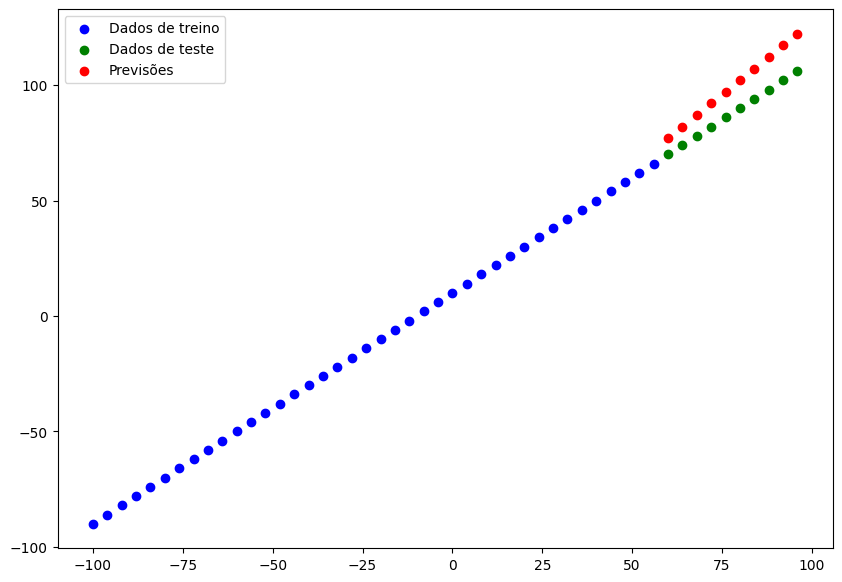

In [ ]:
grafico_previsoes(predictions=y_preds2)

In [ ]:
mae_2 = mae(y_teste, y_preds2.squeeze()).numpy()
mse_2 = mse(y_teste, y_preds2.squeeze()).numpy()
mae_2, mse_2

(11.615431, 143.5311)

### modelo 3

In [ ]:
# criação do terceiro modelo
modelo3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # adicionando mais uma camada
])

modelo3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

modelo3.fit(tf.expand_dims(x_treino, axis=-1), y_treino, epochs=500, verbose=0) # vamos adicionar mais epochs

In [ ]:
y_preds3 = modelo3.predict(x_teste)

1/1 [==============================] - 0s 69ms/step


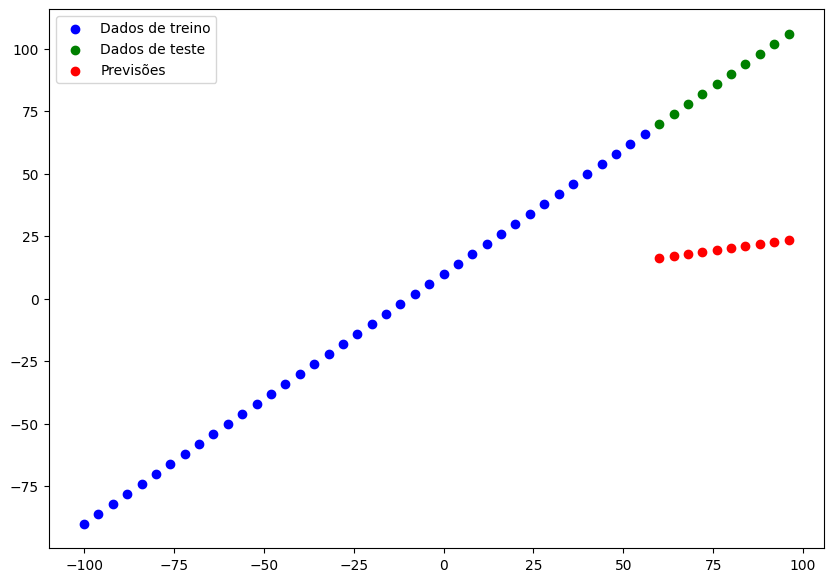

In [ ]:
grafico_previsoes(predictions=y_preds3)

In [ ]:
mae_3 = mae(y_teste, y_preds3.squeeze()).numpy()
mse_3 = mse(y_teste, y_preds3.squeeze()).numpy()
mae_3, mse_3

(67.92916, 4698.8936)

## comparando resultados

In [ ]:
resultados_modelos = [["modelo1", mae_1, mse_1],
              ["modelo2", mae_2, mse_2],
              ["modelo3", mae_3, mse_3]]

In [ ]:
resultado_final =pd.DataFrame(resultados_modelos, columns=["modelo", "mae", "mse"])
resultado_final

,modelo,mae,mse
0,modelo1,30.749228,956.033081
1,modelo2,11.615431,143.531097
2,modelo3,67.929161,4698.893555


## Salvando o melhor modelo

In [ ]:
modelo2.save('melhor_modeloSavedModel_format')

In [ ]:
!ls melhor_modeloSavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables
